In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
url = "http://www.hubertiming.com/results/2017GPTR10K"

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [6]:
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta content="Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!" property="og:title"/>
<meta content="Results of the 2017 Intel Great Place to Run \ Urban Clash Games at Hillsboro Stadium in Hillsboro, OR" property="og:description"/>
<meta content="https://www.hubertiming.com/results/2017GPTRForResults.jpg" property="og:image"/>
<meta content="https://www.hubertiming.com/results/2017GPTR10K" property="og:url"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css"/>
<link href="//cd

In [7]:
soup.find_all('table')[1]


<table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
<thead>
<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>
</thead>
<tbody>
<tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>
<tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>
<tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

                </td>
<td>M</td>
<td>P

In [9]:
table = soup.find_all('table')[1]
table

<table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
<thead>
<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>
</thead>
<tbody>
<tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>
<tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>
<tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

                </td>
<td>M</td>
<td>P

In [11]:
table_titles = table.find_all('th')
table_titles

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Time</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [13]:
table_head_titles = [title.text.strip() for title in table_titles]
table_head_titles

['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time', 'Team']

In [14]:
df = pd.DataFrame(columns = table_head_titles)

df

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team


In [16]:
column_data = table.find_all('tr')
column_data


[<tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Time</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>,
 <tr data-bib="814">
 <td>1</td>
 <td>814</td>
 <td>
 
                     JARED WILSON
 
                 </td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>36:21</td>
 <td>36:24</td>
 <td></td>
 </tr>,
 <tr data-bib="573">
 <td>2</td>
 <td>573</td>
 <td>
 
                     NATHAN A SUSTERSIC
 
                 </td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>36:42</td>
 <td>36:45</td>
 <td>
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                             INTEL TEAM F
                         </td>
 </tr>,
 <tr data-bib="687">
 <td>3</td>
 <td>687</td>
 <td>
 
                     FRANCISCO MAYA
 
                 </td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>37:44</td>
 <td>37:48</td>
 <td></td>
 </tr>,
 <tr d

In [18]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data
    

In [19]:
df

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
...,...,...,...,...,...,...,...,...,...
1149,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,1:38:34,
1150,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I
1151,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,1:40:34,
1152,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,1:42:01,


In [23]:
df.to_csv(r'/home/mikesh/Desktop/Data Science/Web scrapping/Racing_Data.csv', index = False)

In [30]:
df = pd.read_csv('/home/mikesh/Desktop/Data Science/Web scrapping/Racing_Data.csv')
df

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,NaN
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,NaN
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,NaN
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
...,...,...,...,...,...,...,...,...,...
1149,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,1:38:34,NaN
1150,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I
1151,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,1:40:34,NaN
1152,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,1:42:01,NaN


In [40]:
# Check for missing values
df.isnull().sum()


Place         0
Bib           0
Name          0
Gender        0
City         34
State        34
Time          0
Gun Time      0
Team        994
dtype: int64

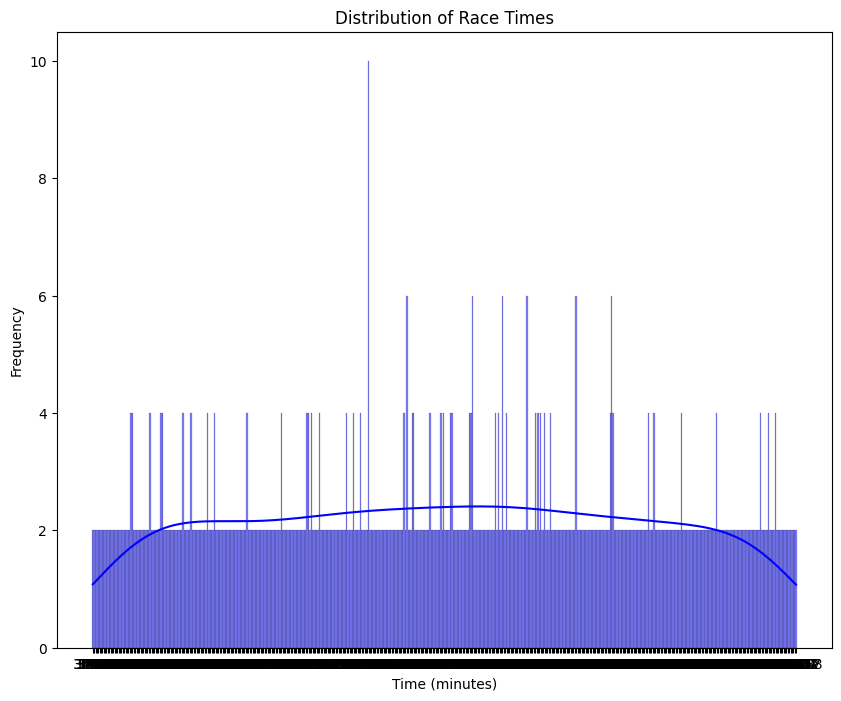

In [38]:
# Plot a histogram of race times
plt.figure(figsize=(10, 8))
sns.histplot(df['Time'], kde=True, bins=20, color='blue')
plt.title('Distribution of Race Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()


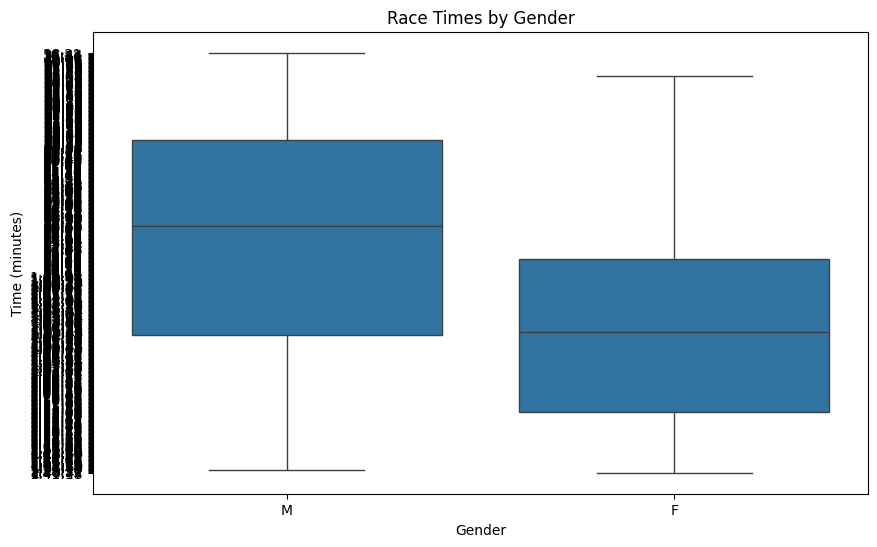

In [45]:
# Box plot of race times by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Time', data=df)
plt.title('Race Times by Gender')
plt.xlabel('Gender')
plt.ylabel('Time (minutes)')
plt.show()


/tmp/ipykernel_50717/1635877540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


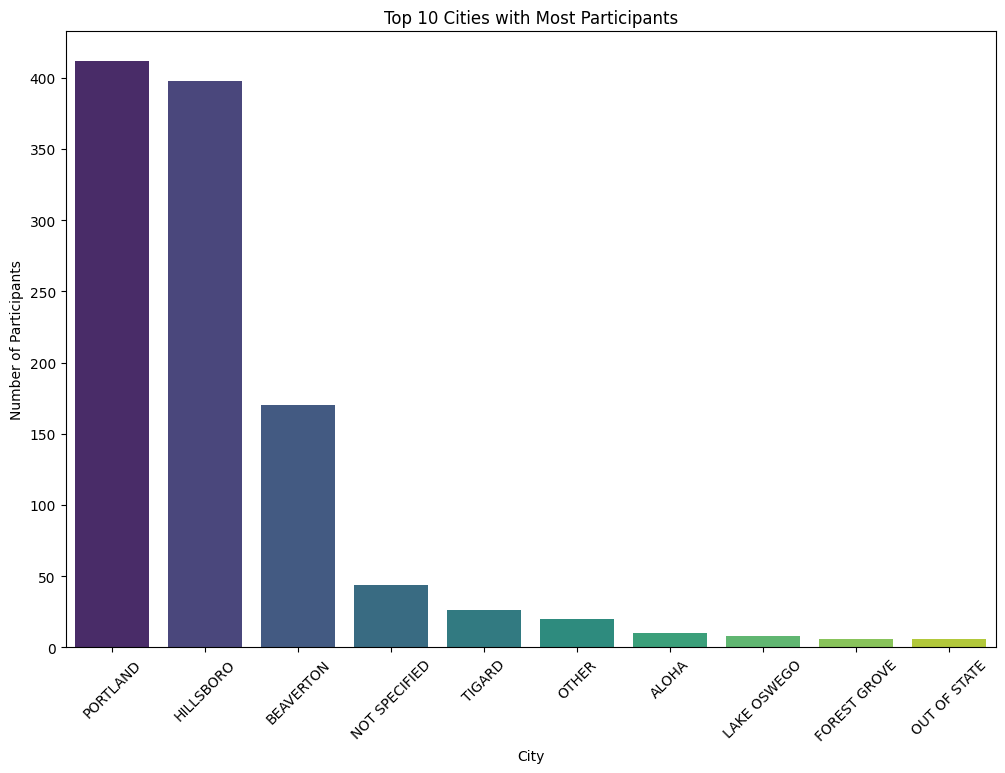

In [47]:
# Bar plot of top 10 cities with most participants
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with Most Participants')
plt.xlabel('City')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()
